## Analysis to predict Breast Cancer

### Introduction

Besides skin cancer, breast cancer is the most commonly diagnosed cancer among American women. In 2019, it's estimated that about 30% of newly diagnosed cancers in women will be breast cancers. Breast Cancer occurs as a results of abnormal growth of cells in the breast tissue, commonly referred to as a "Tumor". A tumor does not mean cancer - tumors can be Benign (B, not cancerous), pre-malignant (pre-cancerous), or Malignant (M, cancerous).The dataset is showing some factors that might influence breast cancer. The dataset has historic medical records of 569 patients and 32 variables. It contains 569 samples of malignant and benign tumor cells.

### Project Motivation and Goal

The labels in the data being discrete, the predication would fall into two categories, Malignant or Benign, making this is a classification problem. The goal, therefore, would be to classify whether the breast cancer is benign or malignant and predict the recurrence and non-recurrence of malignant cases after a certain period. To achieve this we will have to use certain machine learning classification methods that can predict the discrete class of a new input.

#### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#### Loading the Dataset

In [2]:
data = pd.read_csv(r'C:\Users\Gaurav\Desktop\Breast Cancer\Data\breast-cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#### Inspecting the Data

In [3]:
#since "id" column does not give us much information, we can drop it
data.drop('id', axis =1, inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

From the above results, we see that the column "diagnosis" is 569 non-null object, while the rest are float.

In [5]:
#checking for missing variables, if any
data.isnull().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

In [6]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

We see that "diagnosis" is a categorical variable because it shows a fixed number of possible values (i.e, Malignant (M) or Benign (B)). The machine learning algorithms want numbers, and not strings, as their inputs so we will need to convert them later.

### Exploratory Data Analysis (EDA)

#### Descriptive statistics
Condensing key characteristics of the data set into simple numeric metrics, like: mean, standard deviation, correlation, etc.

In [7]:
#Calculating the descriptive statistics for each variable
#"mean" is the mean of each column and "50%" is the median
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [8]:
# Skew results in either a positive (right) or negative (left) skew value on a plot, and the values that are near 0 show less skew.

data.skew()

radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

#### Visualization (Analyzing the variables separately) 
This part is important as it will give us some idea about the variables, which one plays a major role in deciding the cancer detection. It includes projecting the data into Cartesian plane or into abstract images. This part of data exploration is leveraged for preprocessing of the data, data modeling, and interpretation of results.

B    357
M    212
Name: diagnosis, dtype: int64

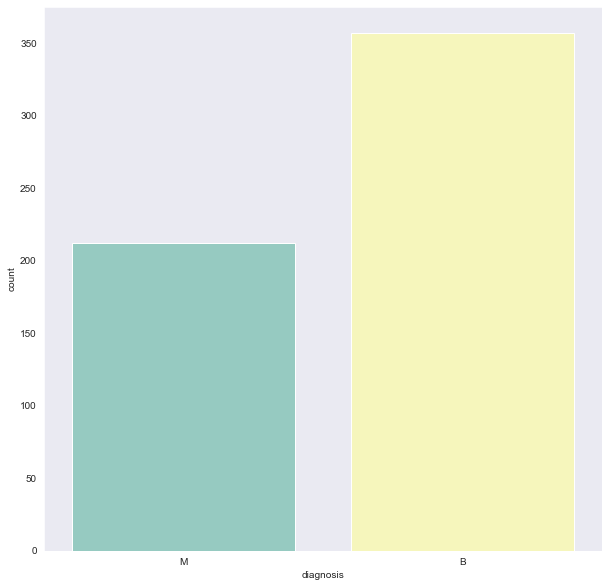

In [9]:
# frequency of cancer diagnosis (M or B)

sns.set_style("dark")
sns.set_context({"figure.figsize": (10, 10)})
sns.countplot(data['diagnosis'],label='Count',palette="Set3")

data['diagnosis'].value_counts()

This shows that there are 357 patients in the data that do not have cancer cells and 212 patients that show the presence of cancer cells.

Note: I am using 3 data visualizations for plotting the data variables here: histograms, box plots, and a multimodel plot (correlation matrix).

Index(['diagnosis'], dtype='object')
Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')


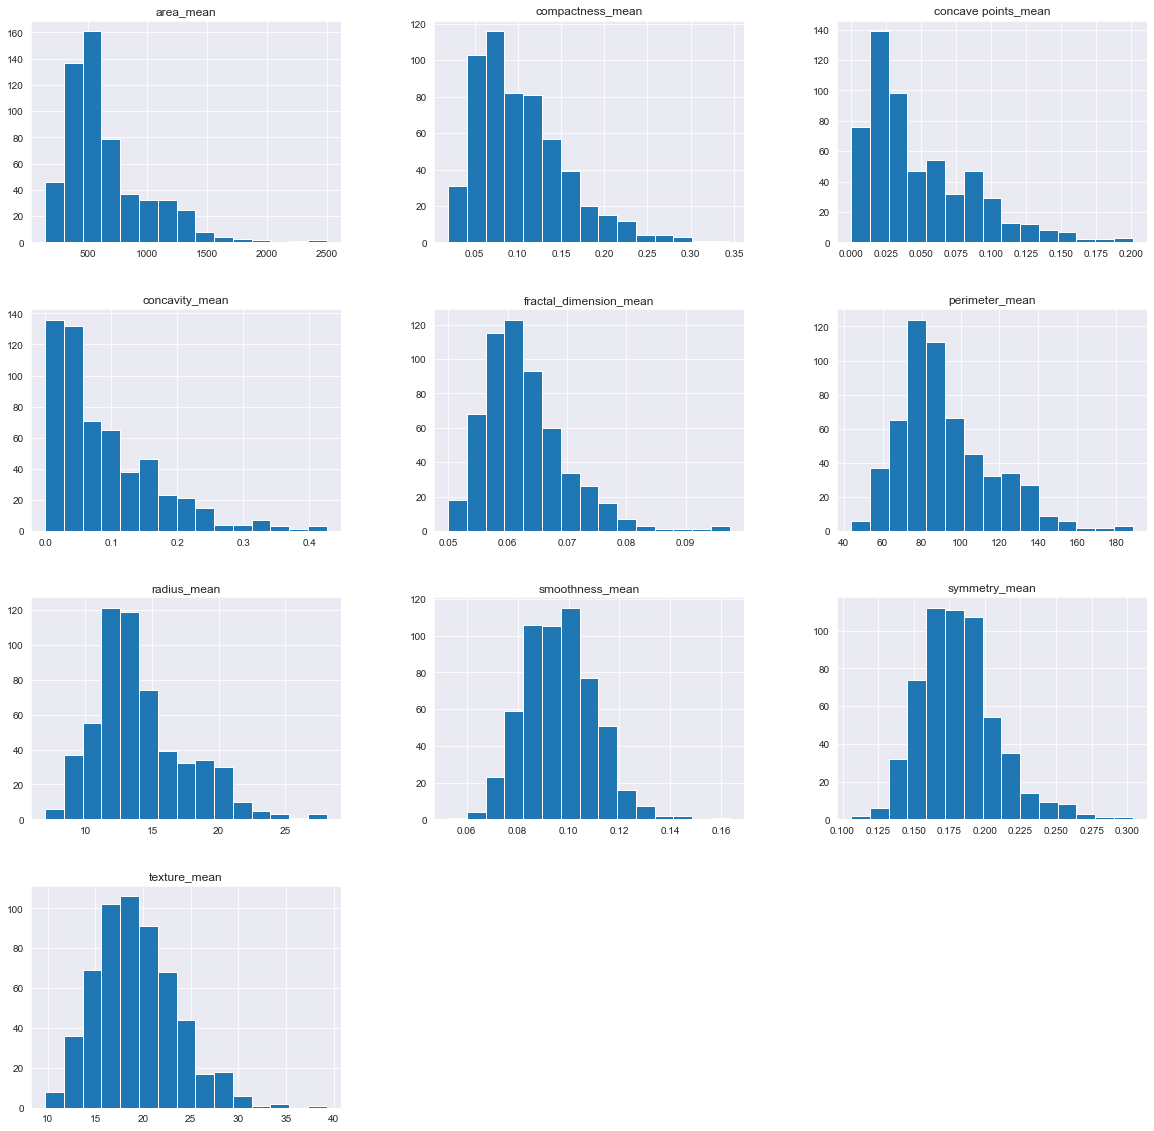

In [10]:
# plotting the columns as groups of mean/ worst/ etc. as histograms

diag1 = data.loc[:,["diagnosis"]]

data_mean=data.iloc[:,1:11] # these locations have the variables ending in "_mean", hence a function of mean
print(diag1.columns)
print(data_mean.columns)

mean_histogram = data_mean.hist(bins=15, figsize=(20,20))

Index(['diagnosis'], dtype='object')
Index(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst'],
      dtype='object')


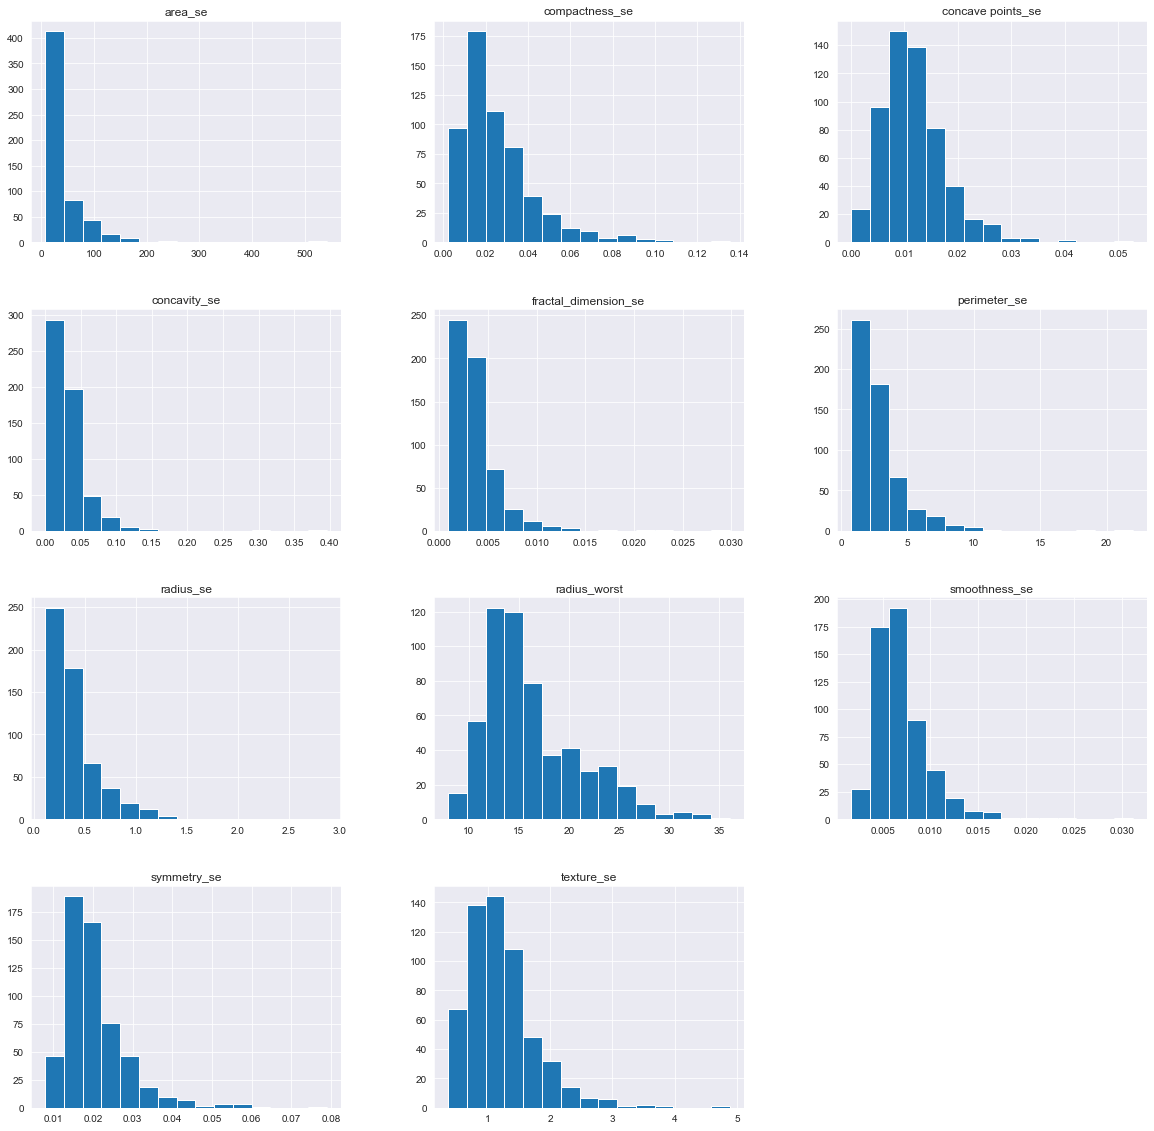

In [11]:
diag2 = data.loc[:,["diagnosis"]]

data_se = data.iloc[:,11:22] # these locations have the variables ending in "_se"
print(diag2.columns)
print(data_se.columns)

se_histogram = data_se.hist(bins=15, figsize=(20,20))

Index(['diagnosis'], dtype='object')
Index(['perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


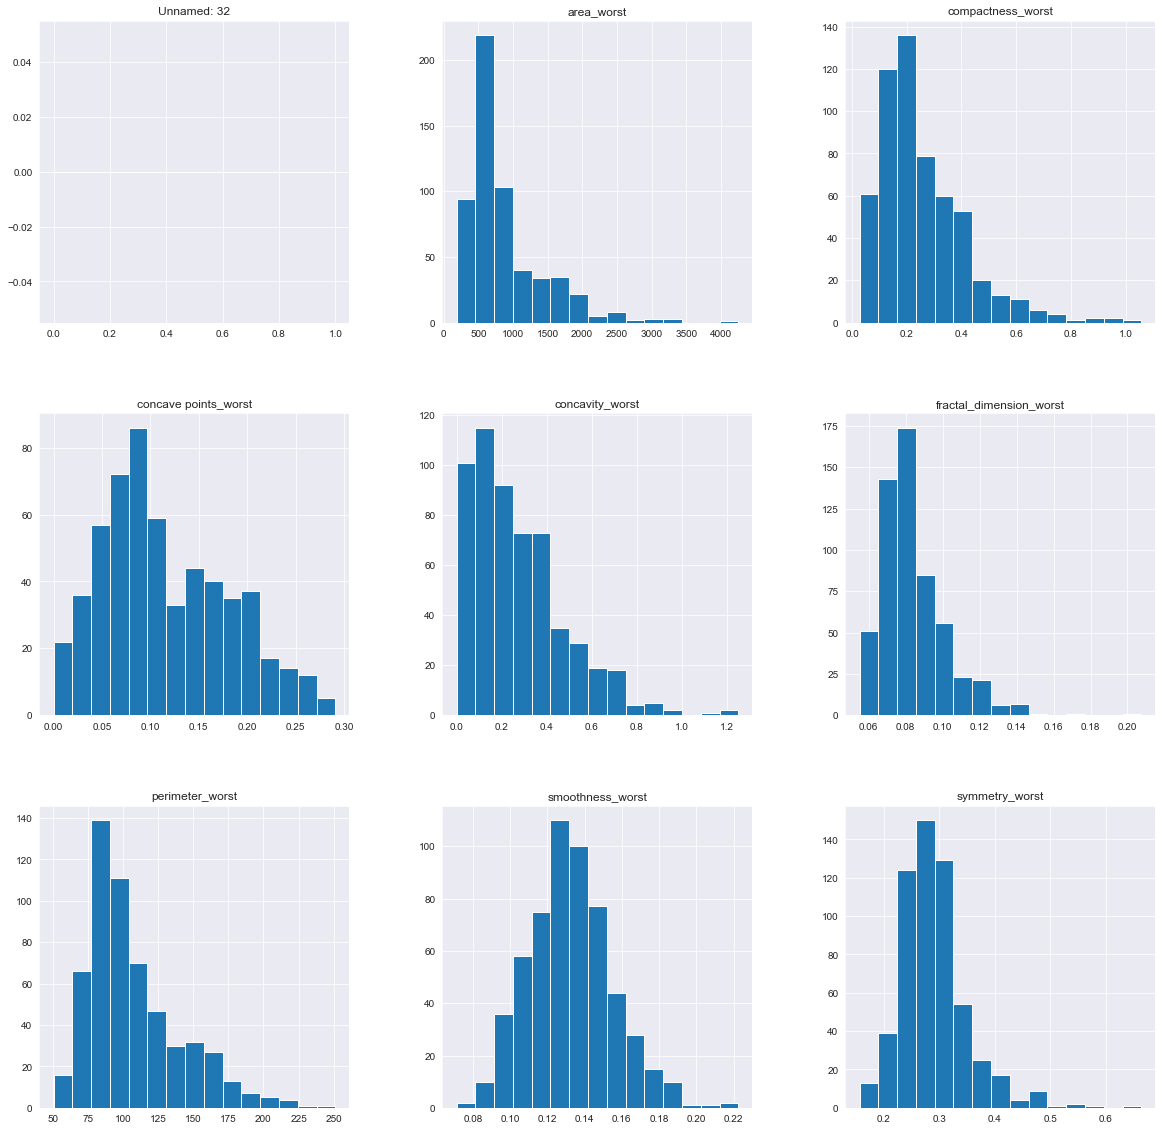

In [12]:
diag3 = data.loc[:,["diagnosis"]]

data_worst = data.iloc[:,23:] # these locations have the variables ending in "_worst"
print(diag3.columns)
print(data_worst.columns)

worst_histogram = data_worst.hist(bins=15, figsize=(20,20))

These plots show some exponential and some Gaussian distributions. These variables would be important for our further analysis because the Machine Learning techniques use these distributions on the input variables. These plots show some exponential distributions in concavity and cocaviy point, along with texture, symmetry and smoothness having a Gaussian distribution.

In [13]:
#plotting box plots for the data to visualize the distribution 

{'whiskers': [<matplotlib.lines.Line2D at 0x20b8d943f98>,
 'caps': [<matplotlib.lines.Line2D at 0x20b8d9609b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20b8d943e10>,
 'medians': [<matplotlib.lines.Line2D at 0x20b8d960e48>,
 'fliers': [<matplotlib.lines.Line2D at 0x20b8d965470>,
 'means': []}

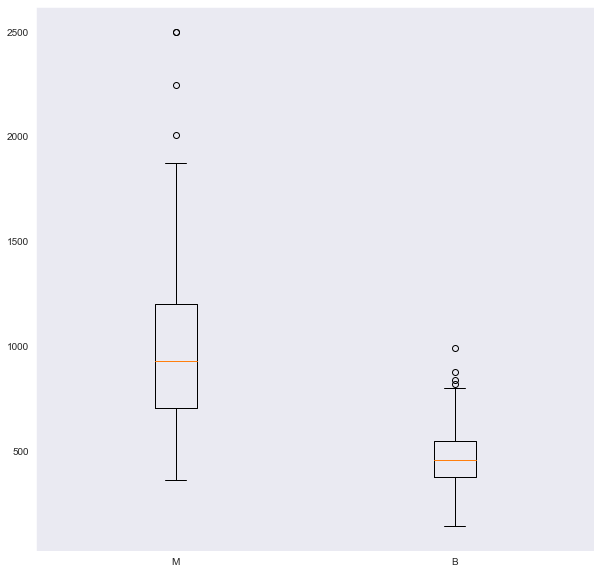

In [14]:
malignant = data[data['diagnosis']=='M']['area_mean']
benign = data[data['diagnosis']=='B']['area_mean']
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([malignant,benign], labels=['M', 'B'])

Since the notches in the boxplots do not overlap, we can conclude that with 95% confidence, that the true medians do differ.

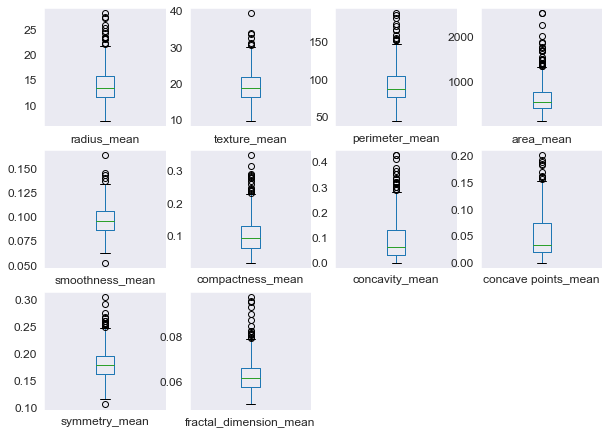

In [15]:
#box plot for "_mean" suffix variables in data
box_plot = data_mean.plot(kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False, fontsize = 12)

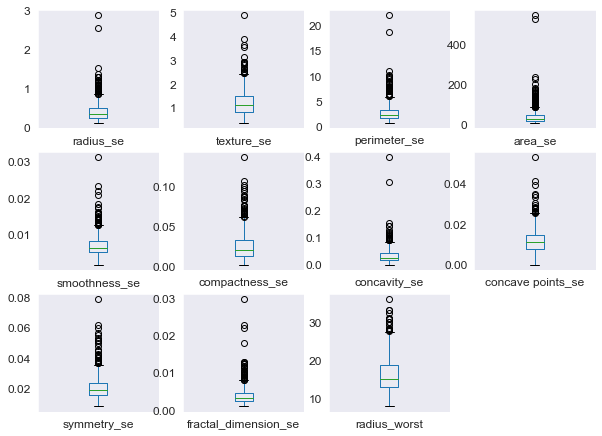

In [16]:
#box plot for "_se" suffix variables in data
box_plot = data_se.plot(kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False, fontsize = 12)

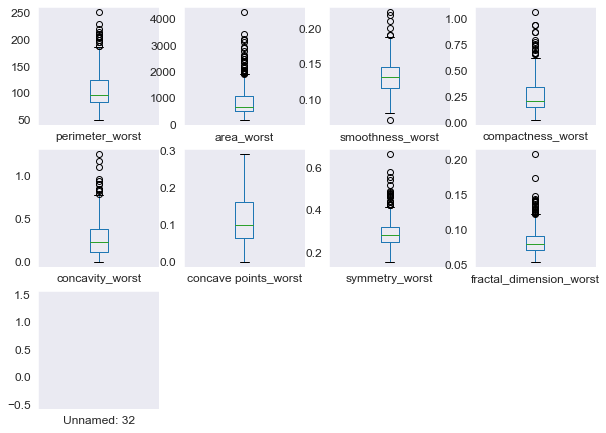

In [17]:
#box plot for "_worst" suffix variables in data
box_plot = data_worst.plot(kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False, fontsize = 12)

These box plots show that some attributes like radius, area, compactness, concavity may have an exponential distribution, along with the gaussian distributions in the texture, smoothness and symmetry attributes.

In [18]:
#plotting correlation matrix for the data to show a multimodel visualization

In [19]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


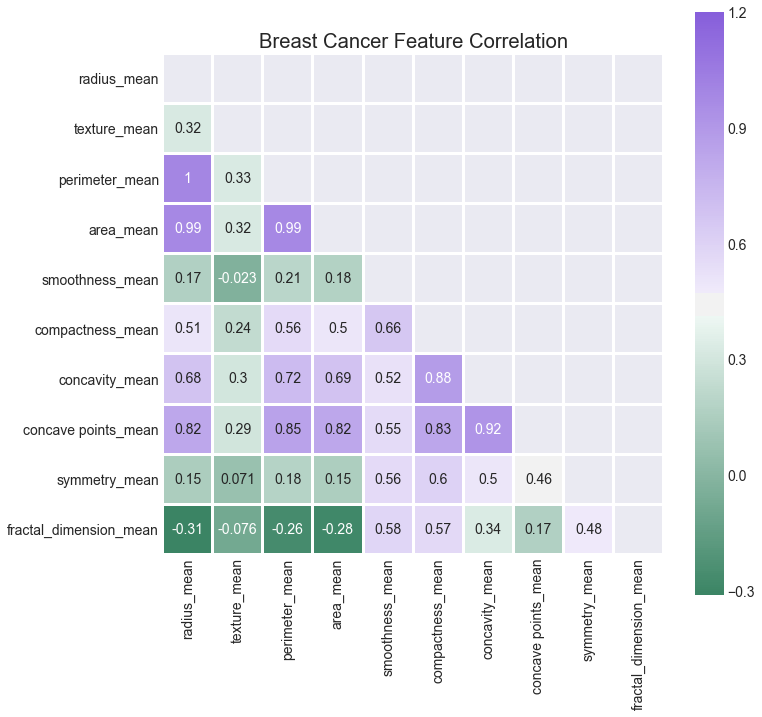

In [20]:
plt.style.use('fivethirtyeight')
sns.set_style("dark")

data1 = pd.read_csv(r'C:\Users\Gaurav\Desktop\Breast Cancer\Data\breast-cancer.csv', index_col=False)
data1.drop('Unnamed: 32',axis=1, inplace=True)

# Correlation matrix for the mean data
corr = data_mean.corr()

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

data1, ax = plt.subplots(figsize=(10, 10))
plt.title('Breast Cancer Feature Correlation')

# Custom diverging colormap
cmap = sns.diverging_palette(150, 275, as_cmap=True)

# Heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask, 
            ax=ax,annot=True, fmt='.2g',linewidths=2)

Note:

Here, we can draw a strong positive relationship with mean values paramaters between 1-0.75. The mean area of the tissue nucleus has a strong positive correlation with mean values of radius and parameter. Similarly, there is a strong negative correlation between fractal_dimension with radius, texture, parameter mean values.

In [21]:
#plotting a scatter plot to visualize the data before further analysis

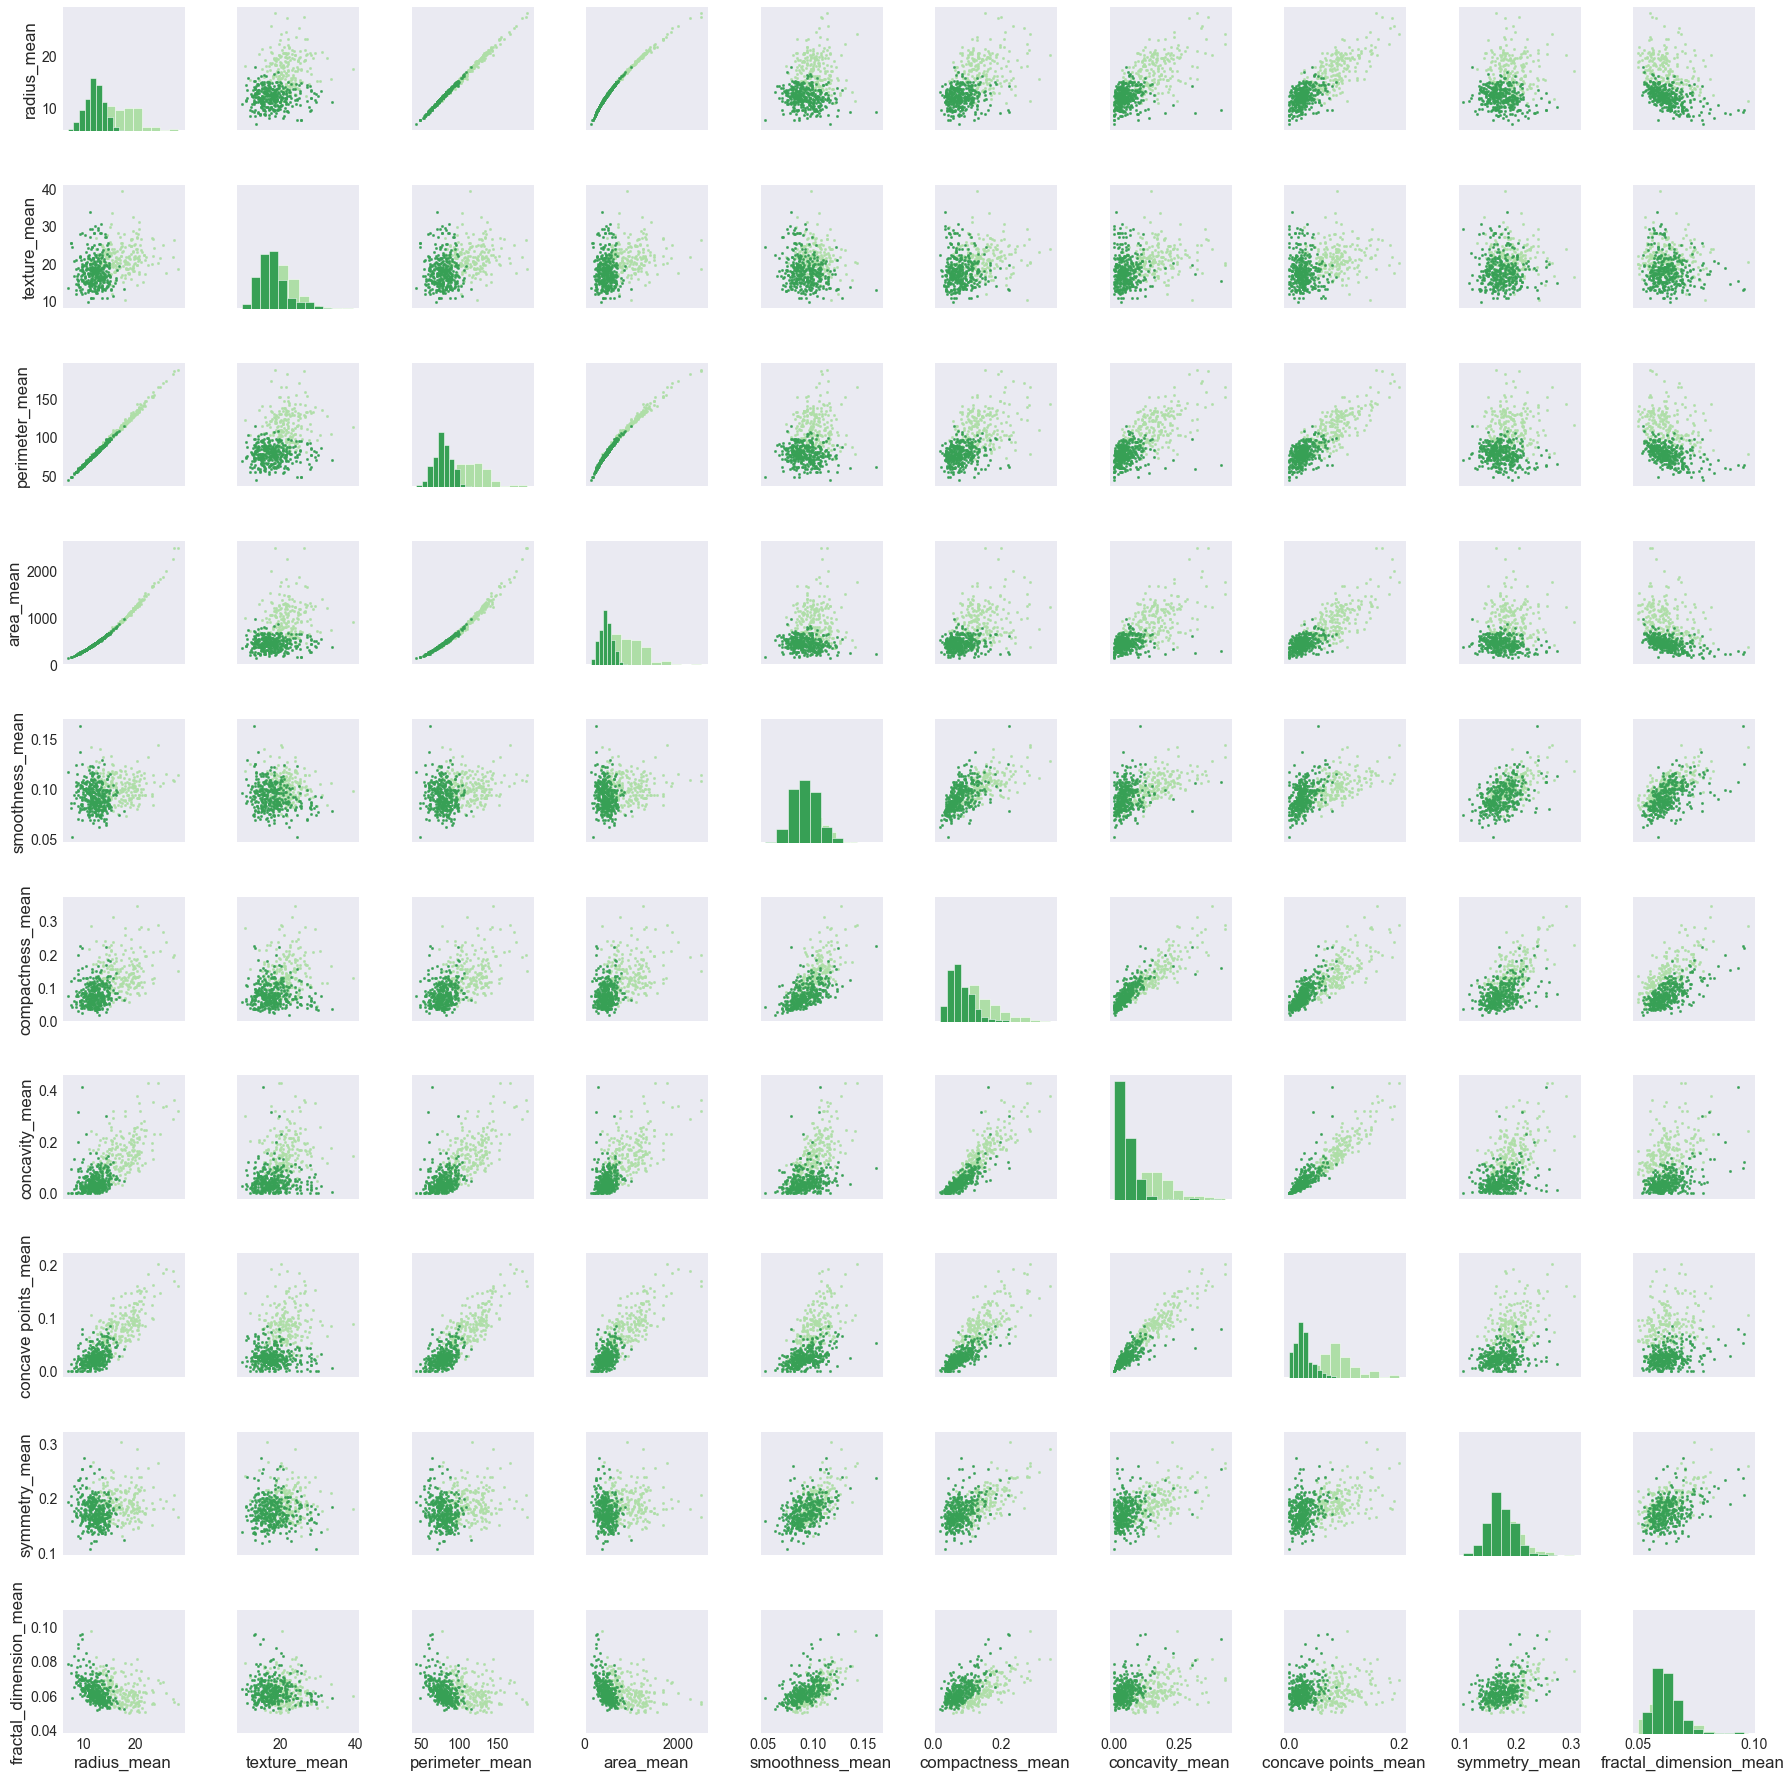

In [22]:
sns.set_style("dark")

data2 = pd.read_csv(r'C:\Users\Gaurav\Desktop\Breast Cancer\Data\breast-cancer.csv', index_col=False)
data2.drop('Unnamed: 32',axis=1, inplace=True)
g = sns.PairGrid(data2[[data2.columns[1],data2.columns[2],data2.columns[3],
                     data2.columns[4], data2.columns[5],data2.columns[6], data2.columns[7], data2.columns[8], data2.columns[9], data2.columns[10],data2.columns[11]]],hue='diagnosis', palette="Greens")
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, s = 5)

Note: 

Mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer. Larger values of these parameters tends to show a correlation with Malignant tumors and distinguish them from the Benign. Also, the mean values of texture, and smoothness, symmetry or fractual dimension does not show a distinct and particular preference of one diagnosis over the other, they overlap. There are no further noticeable large outliers in the histograms that show any distinction.

### Data Pre-processing

Pre-processing the data involves a number of steps like:
- Assigning numerical values to categorical data
- Handling missing values 
- Normalizing the features (so that features on small scales do not dominate when fitting a model to the data).

Till now, I explored the data in order to help understand the distribution of the data and how the variables correlate to each other. The features of interest, as mentioned before, give us a rough idea about the important variables to look in the data to distinguish the Malignant tumors from the Benign. Next, the aim is to find the most predictive features of the data and filter it so that it enhances the predictive power of the analytical model that I will build.

In [23]:
data.drop('Unnamed: 32',axis=1, inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [24]:
data3 = data2
data = data3

In [25]:
#Call the transform method of LabelEncorder on two dummy variables
#label_enc.transform(['M', 'B'])
#data3.head()

data4 = data
data4.diagnosis[data4.diagnosis == 'M'] = 1
data4.diagnosis[data4.diagnosis == 'B'] = 0

data4.diagnosis.unique()
#data4.tail()

C:\Users\Gaurav\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Gaurav\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


array([1, 0], dtype=object)

Note:

After encoding the class labels(diagnosis) in an array y, the Malignant tumors (M) are now represented as class 1(i.e cancer cells present) and the Benign tumors (B) are represented as class 0 (i.e cancer cells absent).

#### Splitting data into training set and test set to assess the Model Accuracy

Here, I will use different training and testing datasets to evaluate the performance of any machine learning algorithm.
The steps include:
- Splittng the data into a training and a testing sets. (80% training and 20% test)
- Train the algorithm on the first part
- Make predictions on the second part
- Evaluate the predictions against the expected results

In [26]:
#Assigning the 30 features of the Breast Cancer data set to a NumPy array X, and change the class labels from the string representation (M and B) into integers (1 and 0)
#Assign predictors to a variable of ndarray (matrix) type
data5= data4
y=data5.diagnosis
x=data5.drop('diagnosis',axis=1)
data5.shape
#data5.head()

(569, 32)

In [27]:
##Splitting data set into 80% training and 20% testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((455, 31), (455,), (114, 31), (114,))

#### Feature Standardization
As explored in the EDA part above, the raw data has differing distributions which may have an impact on the most Machine Learning algorithms (which behave much better if features are on the same scale).
Here, I  scale and transform the data such that each attribute has a mean value of zero and a SD of one.

In [31]:
array = data5.values
X = array[:,0:]
Y = array[:,1]

In [32]:
# Normalize the  data (center around 0 and scale to remove the variance).
scaler =StandardScaler()
xs = scaler.fit_transform(X) #normalizing 
#x_test = scaler.transform(x_test)

In [33]:
np.mean(X),np.std(X)

(949177.7664466045, 22704828.396793053)

In [34]:
# feature extraction
pca = PCA(n_components = 10)
fitX = pca.fit(xs)
print(fitX.components_)

[[ 2.20132922e-02  2.16835592e-01  2.16404027e-01  1.03705734e-01
   2.24541449e-01  2.18006681e-01  1.37491085e-01  2.31310529e-01
   2.51115412e-01  2.55161269e-01  1.32845487e-01  5.77855009e-02
   2.01029857e-01  1.54622802e-02  2.05740326e-01  1.98169346e-01
   1.13755627e-02  1.61834101e-01  1.45749613e-01  1.76263374e-01
   3.82549061e-02  9.50271520e-02  2.25596809e-01  1.05058041e-01
   2.33635556e-01  2.22021699e-01  1.25187917e-01  2.04288155e-01
   2.22927498e-01  2.46161454e-01  1.20461432e-01  1.26524229e-01]
 [-3.23675385e-02 -7.70349679e-02 -2.26045159e-01 -5.85866386e-02
  -2.07124743e-01 -2.22896736e-01  1.89042427e-01  1.58966989e-01
   6.81753131e-02 -2.67021580e-02  1.93525229e-01  3.67580893e-01
  -9.75765544e-02  9.07763943e-02 -8.10821756e-02 -1.44070567e-01
   2.04143726e-01  2.38631448e-01  2.02849087e-01  1.36670824e-01
   1.85720018e-01  2.83830266e-01 -2.12407724e-01 -4.51637273e-02
  -1.92093619e-01 -2.11595119e-01  1.72729248e-01  1.48266924e-01
   1.0359

In [35]:
print(fitX.explained_variance_)

[13.94854707  5.74139697  2.86996767  2.00265173  1.66205541  1.23687651
  0.98063022  0.68237416  0.47055269  0.40484958]


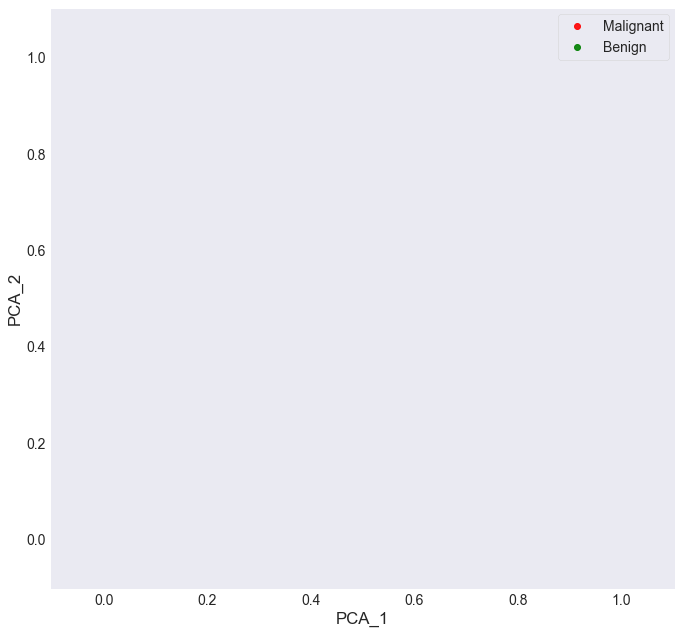

In [36]:
pca_X = pca.transform(xs)

PCA_df = pd.DataFrame()

PCA_df['PCA_1'] = pca_X[:,0]
PCA_df['PCA_2'] = pca_X[:,1]

plt.plot(PCA_df['PCA_1'][data5.diagnosis == 'M'],PCA_df['PCA_2'][data5.diagnosis == 'M'],'o', alpha = 0.9, color = 'r')
plt.plot(PCA_df['PCA_1'][data5.diagnosis == 'B'],PCA_df['PCA_2'][data5.diagnosis == 'B'],'o', alpha = 0.9, color = 'g')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Malignant','Benign'])
plt.show()

In [37]:
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)

[43.51 61.42 70.37 76.62 81.8  85.66 88.72 90.85 92.32 93.58]


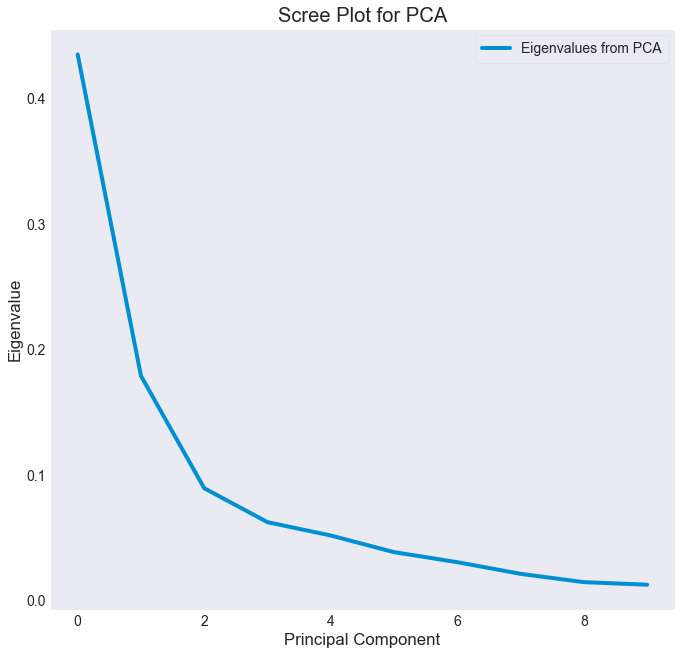

In [38]:
#deciding on how many pca components to retain

plt.plot(var)
plt.title('Scree Plot for PCA')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.5,shadow=False,markerscale=0.5)
leg.get_frame().set_alpha(0.5)
#leg.draggable(state=True)
plt.show()


Since the most obvious change in slope of the plot is at component 2, which is the “elbow” of the scree plot. Hence, it cound be argued that the first three components should be retained. But we will evaluate this further to be sure of the components.

### Predictive model using Support Vector Machine (SVM)

This algorithm is a way of transforming nonlinear data so that one can use a linear algorithm to fit a linear model to the data.

WHY SVM? 
- I chose SVM for this data as SVM allows to make complex decision boundaries, even if the data has only a few features (like in this dataset). 
- Also, running an SVM on data with up to 10,000 samples might work well, but working with datasets of size 100,000 or more can become challenging in terms of runtime and memory usage. Our dataset has only 569 samples, therefore SVM is an optimal way to get some results.

In [41]:
data6=data5
#type(data6.diagnosis)
#data6.diagnosis.unique()
#data6['diagnosis'].astype(int)
#type(data6.diagnosis)
data6.diagnosis.unique()

data6['diagnosis'] = data6['diagnosis'].astype(int)


In [42]:
y=data6.diagnosis
x=data6.drop('diagnosis',axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)
#x_train.shape
#type(x_train)
#type(x)

In [ ]:
#creating SVM and training the algorithm on 80% of the dataset
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)

In [ ]:
## wait run later
 ##optional
#svclassifier = SVC(probability=True)

#Analyze accuracy of predictions on 80% of the holdout test sample.
# = clf.score(x_test, y_test)
#print '\nThe classifier accuracy score is {:03.2f}\n'.format(classifier_score)

In [ ]:
#making predictions 
y_pred = svclassifier.predict(x_test)

Note: 

Confusion matrix, precision, recall, and F1 measures are the most commonly used metrics for classification tasks. Here we are going to use classification_report and confusion_matrix methods to find out the values for these important metrics.

In [ ]:
#evaluating the algorithm 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn import metrics, preprocessing
# for visualization
import seaborn as sns 

In [ ]:
plt.style.use('fivethirtyeight')
sns.set_style("dark")

plt.rcParams['figure.figsize'] = (10,5) 